# sprint1 機械学習フロー

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
#import seaborn as sns
# from sklearn import cross_validation

In [3]:
cd /content/drive/MyDrive/Data/house-prices-advanced-regression-techniques

/content/drive/MyDrive/Data/house-prices-advanced-regression-techniques


## データを読み込み、前処理

In [4]:
# データを読み込む
app_train = pd.read_csv("application_train.csv")
app_test = pd.read_csv("application_test.csv")

In [5]:
# 読み込んだデータの確認
display(app_train.head(3))
display(app_test.head(3))

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


In [6]:
# trainデータを説明変数と目的変数にわける
X = app_train.loc[:, app_train.columns != "TARGET"]
y = app_train["TARGET"]
# 確認
display(X.head(3))
display(y.head(3))

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


0    1
1    0
2    0
Name: TARGET, dtype: int64

In [7]:
# 前処理
X_selected = X.select_dtypes(include=float).dropna(how="any", axis=1) #サンプル数は変わっていない
display(X_selected.shape)

(307511, 4)

In [8]:
# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_selected)
X_selected_transformed = scaler.transform(X_selected)
display(X_selected_transformed)

array([[ 0.14212925, -0.47809496, -0.14945221,  0.37983698],
       [ 0.42679193,  1.7254498 , -1.25275029,  1.07869689],
       [-0.4271961 , -1.15288792, -0.78345096,  0.20611551],
       ...,
       [-0.06662338,  0.19537871, -1.14711999, -0.49700228],
       [ 0.00928667, -0.56875681, -1.12463468,  0.68810743],
       [-0.04764587,  0.18875991,  1.83294163, -0.04027377]])

## モデルと評価指標

In [9]:
# 2値分類の評価指標を計算
from sklearn import metrics
from sklearn.metrics import roc_auc_score

def evaluate(y_true, y_pred, y_pred_proba):
    """
    2値分類の評価指標を計算する
    """
    acc = metrics.accuracy_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred)
    recall = metrics.recall_score(y_true, y_pred)
    f1 = metrics.f1_score(y_true, y_pred)
    confusion = metrics.confusion_matrix(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred_proba[:, 1])
    return acc, precision, recall, f1, confusion, auc

In [10]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier

def pred_random_forest(X_train, X_test, y_train, y_test):
    random_forest = RandomForestClassifier()
    model = random_forest
    model_name = "Random Forest"
    print(model_name)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    print("acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}\nauc \n {}".format(*evaluate(y_test, y_pred, y_pred_proba)))

## 【問題1】クロスバリデーション

In [11]:
# KFoldクラスによるクロスバリデーション
from sklearn.model_selection import KFold

n_splits = 4
"""
n_splits = k の値をどれくらいにするか。
k = 1 : データが十分に多い場合は、Hold-Out法を用いる。
k = 5,10
k = n : データが少ない場合は、kの値はnに固定される。nはデータセットのサイズ。
"""

def kfold_cross_validation(X, y, n_splits=n_splits):
    """
    KFoldクラスによるクロスバリデーションを行う関数
    """
    kf = KFold(n_splits=n_splits)
    print(kf)
    # print(kf.get_n_splits(X))
    print()
    
    # kf.split()はイテレータ
    for train_index, test_index in kf.split(X):
        print("TRAIN:", train_index, "TEST:", test_index)
        # print(len(train_index), len(test_index))
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        pred_random_forest(X_train, X_test, y_train, y_test)
        print()

In [12]:
kfold_cross_validation(X_selected_transformed, y)

KFold(n_splits=4, random_state=None, shuffle=False)

TRAIN: [ 76878  76879  76880 ... 307508 307509 307510] TEST: [    0     1     2 ... 76875 76876 76877]
Random Forest
acc : 0.9180129555919769
precision : 0.16751269035532995
recall : 0.005346727154893065
f1 : 0.010362694300518135
confusion matrix 
 [[70542   164]
 [ 6139    33]]
auc 
 0.554991895552676

TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [ 76878  76879  76880 ... 153753 153754 153755]
Random Forest
acc : 0.9152683472514894
precision : 0.1164021164021164
recall : 0.0034542314335060447
f1 : 0.006709362610551998
confusion matrix 
 [[70342   167]
 [ 6347    22]]
auc 
 0.5537445813149786

TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [153756 153757 153758 ... 230631 230632 230633]
Random Forest
acc : 0.9179609251021098
precision : 0.13131313131313133
recall : 0.004220094140561597
f1 : 0.008177386381506526
confusion matrix 
 [[70545   172]
 [ 6135    26]]
auc 
 0.5510641829683971

TRAIN: [     0    

## 【問題2】グリッドサーチ

In [13]:
# グリッドサーチ
from sklearn.model_selection import GridSearchCV
# roc_aucで最適化した
parameters = {'n_estimators':[10, 20, 30], 'max_depth':[5, 10]}
random_forest = RandomForestClassifier()
clf_r_f = GridSearchCV(random_forest, parameters, cv=4, scoring="roc_auc")
clf_r_f.fit(X_selected_transformed, y)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [14]:
# 最適化されたモデルを取得
random_forest_best = clf_r_f.best_estimator_
# そのパラメータを取得
random_forest_best_params = clf_r_f.best_params_
print(random_forest_best_params)
# そのスコアを確認
random_forest_best_score = clf_r_f.best_score_
print("best_score =", random_forest_best_score)

{'max_depth': 10, 'n_estimators': 20}
best_score = 0.5944808002099418


### 最適化したモデルでスコアを出してみる

[0.         0.         0.         ... 0.99995756 0.99998585 1.        ]
[0.00000000e+00 1.61524794e-04 4.19964465e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
[1.73506427 0.73506427 0.28078949 ... 0.0054268  0.00467381 0.00342058]


0.6660907880945448

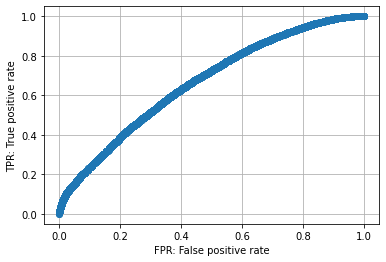

In [15]:
# 一例としてROC曲線を表示
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X_selected_transformed, y, test_size=0.25, random_state=42)
y_pred = random_forest_best.predict_proba(X_test)
roc = roc_curve(y_test, y_pred[:, 1])
fpr, tpr, thresholds = roc

plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
print(fpr)
print(tpr)
print(thresholds)

roc_auc_score(y_test, y_pred[:, 1])

### 提出用のデータで予測をする

In [16]:
# 提出用
app_test_selected = app_test.loc[:, X_selected.columns]
app_test_selected_transformed = scaler.transform(app_test_selected)
app_test_pred = random_forest_best.predict_proba(app_test_selected_transformed)[:, 1]
app_test_pred

array([0.10964706, 0.05110824, 0.10251786, ..., 0.10200559, 0.1113703 ,
       0.11147821])

In [17]:
# テスト値を再読み込みして，RandomForestでクラス分類したカラムを追加
df_out = pd.read_csv("application_test.csv")
df_out["TARGET"] = app_test_pred

# outputディレクトリに出力する
df_out[["SK_ID_CURR","TARGET"]].to_csv("submission.csv",index=False)

提出した結果、スコアは 0.58076 であった。

## 【問題3】Kernelからの調査

### どんな人、どんなやり方があるか

・StratifiedKFold()　を使っている人がいた。  
・Automated Feature Engineering という特徴量エンジニアリングの方法がある。  
・データを訓練データと検証データに分けてからグリッドサーチしている人がいた。  
・ダブルクロスバリデーションというものがある。  
・ランダムフォレストの引数をデフォルトから変えている人がいた。  

#### ランダムフォレストの引数を変えていた例

clf = RandomForestClassifier(
    n_estimators=50,
    criterion='gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
    class_weight='balanced'
)

引用元 : https://www.kaggle.com/ynouri/random-forest-k-fold-cross-validation

## 【問題4】高い汎化性能のモデル作成

### StratifiedKFoldクラスによるクロスバリデーション

In [18]:
# StratifiedKFoldクラスによるクロスバリデーション
from sklearn.model_selection import StratifiedKFold

n_splits = 4
def stratified_kfold_cross_validation(X, y, n_splits=n_splits):
    """
    StratifiedKFoldクラスによるクロスバリデーションを行う関数
    """
    kf = StratifiedKFold(n_splits=n_splits)
    print(kf)
    # print(kf.get_n_splits(X))
    print()
    
    # kf.split()はイテレータ
    for train_index, test_index in kf.split(X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        # print(len(train_index), len(test_index))
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        pred_random_forest(X_train, X_test, y_train, y_test)
        print()

In [19]:
stratified_kfold_cross_validation(X_selected_transformed, y)

StratifiedKFold(n_splits=4, random_state=None, shuffle=False)

TRAIN: [ 76838  76839  76840 ... 307508 307509 307510] TEST: [    0     1     2 ... 77221 77223 77234]
Random Forest
acc : 0.9177788183875751
precision : 0.1797752808988764
recall : 0.005155469631061705
f1 : 0.010023492560689117
confusion matrix 
 [[70525   146]
 [ 6175    32]]
auc 
 0.5558344775528632

TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [ 76838  76839  76840 ... 153894 153895 153896]
Random Forest
acc : 0.9170894143968366
precision : 0.1111111111111111
recall : 0.003867225265871737
f1 : 0.00747430706944877
confusion matrix 
 [[70480   192]
 [ 6182    24]]
auc 
 0.5546470243108268

TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [152104 152116 152120 ... 230719 230720 230721]
Random Forest
acc : 0.9173625744686387
precision : 0.1306532663316583
recall : 0.004189494038027715
f1 : 0.008118657298985168
confusion matrix 
 [[70499   173]
 [ 6180    26]]
auc 
 0.5506837310577719

TRAIN: [   

StratifiedKFold にしてもあまりaucは変わらなかった。

### ランダムフォレストの引数を変えてみる

In [20]:
def pred_random_forest_1(X_train, X_test, y_train, y_test):
    random_forest = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, random_state=0, verbose=0, warm_start=False, class_weight='balanced')
    model = random_forest
    model_name = "Random Forest"
    print(model_name)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    print("acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}\nauc \n {}".format(*evaluate(y_test, y_pred, y_pred_proba)))

In [21]:
n_splits = 4
def stratified_kfold_cross_validation_1(X, y, n_splits=n_splits):
    """
    StratifiedKFoldクラスによるクロスバリデーションを行う関数
    """
    kf = StratifiedKFold(n_splits=n_splits)
    print(kf)
    # print(kf.get_n_splits(X))
    print()
    
    # kf.split()はイテレータ
    for train_index, test_index in kf.split(X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        # print(len(train_index), len(test_index))
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        pred_random_forest_1(X_train, X_test, y_train, y_test)
        print()

In [22]:
stratified_kfold_cross_validation_1(X_selected_transformed, y)

StratifiedKFold(n_splits=4, random_state=None, shuffle=False)

TRAIN: [ 76838  76839  76840 ... 307508 307509 307510] TEST: [    0     1     2 ... 77221 77223 77234]
Random Forest
acc : 0.5142433466011083
precision : 0.09960651184322197
recall : 0.623972933784437
f1 : 0.17178975382568196
confusion matrix 
 [[35661 35010]
 [ 2334  3873]]
auc 
 0.5950826681412837

TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [ 76838  76839  76840 ... 153894 153895 153896]
Random Forest
acc : 0.5173261531257317
precision : 0.0995100961663081
recall : 0.6185949081533999
f1 : 0.1714413308027241
confusion matrix 
 [[35932 34740]
 [ 2367  3839]]
auc 
 0.5895607031846969

TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [152104 152116 152120 ... 230719 230720 230721]
Random Forest
acc : 0.5038112333827623
precision : 0.09894525364138623
recall : 0.6348694811472768
f1 : 0.17120757832529437
confusion matrix 
 [[34792 35880]
 [ 2266  3940]]
auc 
 0.5918941421412495

TRAIN: [     0     

#### さらにグリッドサーチしてみる

In [23]:
# roc_aucで最適化した
parameters = {'min_samples_leaf':[1, 2, 5], 'max_features':["auto", "log2", "sqrt"]}
random_forest_1 = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, random_state=0, verbose=0, warm_start=False, class_weight='balanced')
clf_1_r_f = GridSearchCV(random_forest_1, parameters, cv=4, scoring="roc_auc")
clf_1_r_f.fit(X_selected_transformed, y)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=-1,
                                              oob_score=False, random_state=0,
                                   

In [24]:
# 最適化されたモデルを取得
random_forest_best_1 = clf_1_r_f.best_estimator_
# そのパラメータを取得
random_forest_best_params_1 = clf_1_r_f.best_params_
print(random_forest_best_params_1)
# そのスコアを確認
random_forest_best_score_1 = clf_1_r_f.best_score_
print("best_score =", random_forest_best_score_1)

{'max_features': 'auto', 'min_samples_leaf': 5}
best_score = 0.5913404346041042


#### 提出してみる。

In [25]:
# 提出用
app_test_selected = app_test.loc[:, X_selected.columns]
app_test_selected_transformed = scaler.transform(app_test_selected)
app_test_pred_1 = random_forest_best_1.predict_proba(app_test_selected_transformed)[:, 1]
app_test_pred_1

array([0.57557973, 0.39124833, 0.56730113, ..., 0.56000945, 0.5725557 ,
       0.5792076 ])

In [26]:
# テスト値を再読み込みして，RandomForestでクラス分類したカラムを追加
df_out = pd.read_csv("application_test.csv")
df_out["TARGET"] = app_test_pred_1

# outputディレクトリに出力する
df_out[["SK_ID_CURR","TARGET"]].to_csv("submission_1.csv",index=False)

結果は  
Private Score : 0.58027  
Public Score : 0.57445  
だった。  

In [27]:
print("app_test_pred")
display(pd.DataFrame(app_test_pred).describe().transpose())
print("app_test_pred_1")
display(pd.DataFrame(app_test_pred_1).describe().transpose())

app_test_pred


,count,mean,std,min,25%,50%,75%,max
0,48744.0,0.081505,0.025611,0.0065,0.06372,0.081205,0.10086,0.463223


app_test_pred_1


,count,mean,std,min,25%,50%,75%,max
0,48744.0,0.493175,0.07196,0.153724,0.452686,0.509296,0.551574,0.606369


前回提出したものとスコアがほとんど変わらなかったが、予測の中身がかなり変わった。  
具体的には、前回は0に近い予測が多かったが、今回は0.5に近い予測が多かった。

### 特徴量が全てある状態でランダムフォレストで予測

In [28]:
n_splits = 4
def stratified_kfold_cross_validation_2(X, y, n_splits=n_splits):
    """
    StratifiedKFoldクラスによるクロスバリデーションを行う関数
    """
    kf = StratifiedKFold(n_splits=n_splits)
    print(kf)
    # print(kf.get_n_splits(X))
    print()
    
    # kf.split()はイテレータ
    for train_index, test_index in kf.split(X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        # print(len(train_index), len(test_index))
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        pred_random_forest_1(X_train, X_test, y_train, y_test)
        print()

In [29]:
X_1 = X.copy()

X_1_object_columns = X_1.select_dtypes(include="object").columns
X_1[X_1_object_columns] = X_1[X_1_object_columns].fillna("NaN")
X_1 = X_1.fillna(X_1.median())

In [30]:
from sklearn.preprocessing import LabelEncoder
#LabelEncoderのインスタンスを生成
le = LabelEncoder()

for column in X_1_object_columns:
    print(column)
    #ラベルを覚えさせる
    le = le.fit(X_1[column])
    #ラベルを整数に変換
    X_1[column] = le.transform(X_1[column])

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE
FONDKAPREMONT_MODE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE


In [31]:
random_forest_2 = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, random_state=0, verbose=0, warm_start=False, class_weight='balanced')
random_forest_2.fit(X_1, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [32]:
stratified_kfold_cross_validation_2(X_1, y)

StratifiedKFold(n_splits=4, random_state=None, shuffle=False)

TRAIN: [ 76838  76839  76840 ... 307508 307509 307510] TEST: [    0     1     2 ... 77221 77223 77234]
Random Forest
acc : 0.6611124118733578
precision : 0.14651610145340552
recall : 0.6626389560173997
f1 : 0.23997199451559262
confusion matrix 
 [[46712 23959]
 [ 2094  4113]]
auc 
 0.7190949848212911

TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [ 76838  76839  76840 ... 153894 153895 153896]
Random Forest
acc : 0.67413304196259
precision : 0.15203101920236337
recall : 0.6633902674830809
f1 : 0.24737126719942315
confusion matrix 
 [[47709 22963]
 [ 2089  4117]]
auc 
 0.7268272817679706

TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [152104 152116 152120 ... 230719 230720 230721]
Random Forest
acc : 0.6657691407164599
precision : 0.14799696564678683
recall : 0.6601675797615211
f1 : 0.24178937118238955
confusion matrix 
 [[47086 23586]
 [ 2109  4097]]
auc 
 0.7179147891215284

TRAIN: [     0    

### 特徴量が全てある状態でランダムフォレスト（改良版１）

#### 前処理

In [33]:
X_1 = X.copy()
app_test_1 = app_test.copy()
Xs = pd.concat([X_1, app_test_1])

Xs_object_columns = Xs.select_dtypes(include="object").columns
Xs[Xs_object_columns] = Xs[Xs_object_columns].fillna("NaN")
Xs = Xs.fillna(Xs.median())

In [34]:
from sklearn.preprocessing import LabelEncoder
#LabelEncoderのインスタンスを生成
le = LabelEncoder()

for column in Xs_object_columns:
    print(column)
    #ラベルを覚えさせる
    le = le.fit(Xs[column])
    #ラベルを整数に変換
    Xs[column] = le.transform(Xs[column])

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE
FONDKAPREMONT_MODE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE


In [35]:
X_1 = Xs[:len(X_1)]
app_test_1 = Xs[len(X_1):]

#### 学習

In [36]:
random_forest_2 = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, random_state=0, verbose=0, warm_start=False, class_weight='balanced')
random_forest_2.fit(X_1, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#### 予測

In [37]:
stratified_kfold_cross_validation_2(X_1, y)

StratifiedKFold(n_splits=4, random_state=None, shuffle=False)

TRAIN: [ 76838  76839  76840 ... 307508 307509 307510] TEST: [    0     1     2 ... 77221 77223 77234]
Random Forest
acc : 0.6613595567002263
precision : 0.1463884430176565
recall : 0.6611889801836636
f1 : 0.2397056246714561
confusion matrix 
 [[46740 23931]
 [ 2103  4104]]
auc 
 0.7193193867387738

TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [ 76838  76839  76840 ... 153894 153895 153896]
Random Forest
acc : 0.6747313925960613
precision : 0.15205803968018952
recall : 0.661940058008379
f1 : 0.24730600204683645
confusion matrix 
 [[47764 22908]
 [ 2098  4108]]
auc 
 0.7269723806925181

TRAIN: [     0      1      2 ... 307508 307509 307510] TEST: [152104 152116 152120 ... 230719 230720 230721]
Random Forest
acc : 0.6653008663076563
precision : 0.14821087528377355
recall : 0.6627457299387689
f1 : 0.24224754836999737
confusion matrix 
 [[47034 23638]
 [ 2093  4113]]
auc 
 0.7178061878011966

TRAIN: [     0     

#### 予測（提出用）

In [38]:
app_test_pred_2 = random_forest_2.predict_proba(app_test_1)[:, 1]
app_test_pred_2

array([0.45610626, 0.54461963, 0.39185225, ..., 0.39642583, 0.44321371,
       0.59522521])

In [39]:
# テスト値を再読み込みして，RandomForestでクラス分類したカラムを追加
df_out = pd.read_csv("application_test.csv")
df_out["TARGET"] = app_test_pred_2

# outputディレクトリに出力する
df_out[["SK_ID_CURR","TARGET"]].to_csv("submission_2.csv",index=False)

結果は
Private Score : 0.70969
Public Score : 0.71188
だった。

## 【問題5】最終的なモデルの選定

最終的に一番結果が良かったモデルは、問題４の「特徴量が全てある状態でランダムフォレスト（改良版１）」のモデルで、スコアは、Private Score : 0.70969、Public Score : 0.71188　であった。

RandomForestClassifierのハイパーパラメータは問題３のカーネルを参考にした。
欠損値はobject型では特別な処理をせず、int型とfloat型にはmedianを代入した。
その後、object型はラベルエンコーディングをした。